# Implementation of MCP Neuron for AND and OR Function.

In [25]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  assert len(X1)==len(X2)
  state_neuron=[]
  for x1,x2 in zip(X1,X2):
    sum = x1+x2
    if sum>=T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  return state_neuron

In [26]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [27]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron=[]
    for x1,x2 in zip(X1,X2):
      if x1+x2>=T:
        state_neuron.append(1)
      else:
        state_neuron.append(0)
    return state_neuron


In [28]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/Datasets/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

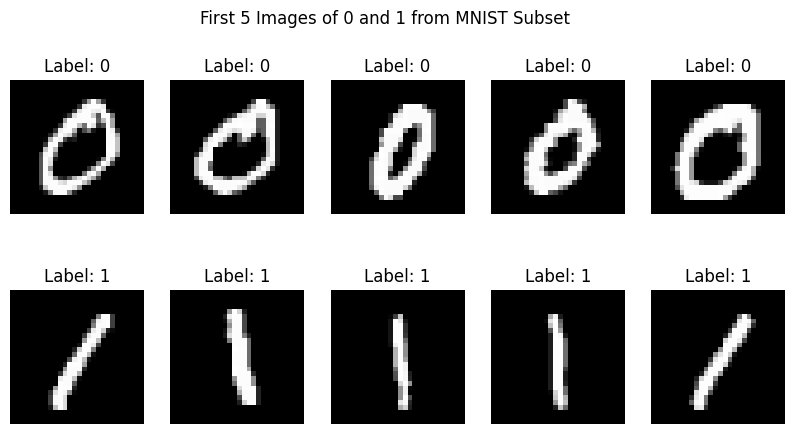

In [30]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [31]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [32]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [33]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    accuracy=0
    for epoch in range(epochs):
      for i in range(len(X)):
        prediction=np.dot(X[i],weights)+bias
        prediction=1 if prediction>=0 else 0
        if prediction!=y[i]:
          weights=weights+learning_rate*(y[i]-prediction)*X[i]
          bias=bias+learning_rate*(y[i]-prediction)
      y_pred_all=np.dot(X,weights)+bias
      y_pred_all=np.where(y_pred_all>=0,1,0)
      accuracy=np.mean(y_pred_all==y)*100
      print(f"Epoch {epoch+1}/{epochs},Accuracy:{accuracy:.1f}%")

    return weights, bias, accuracy

## Training the Perceptron

In [34]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100,Accuracy:99.9%
Epoch 2/100,Accuracy:99.9%
Epoch 3/100,Accuracy:99.9%
Epoch 4/100,Accuracy:100.0%
Epoch 5/100,Accuracy:99.9%
Epoch 6/100,Accuracy:100.0%
Epoch 7/100,Accuracy:100.0%
Epoch 8/100,Accuracy:100.0%
Epoch 9/100,Accuracy:100.0%
Epoch 10/100,Accuracy:99.9%
Epoch 11/100,Accuracy:100.0%
Epoch 12/100,Accuracy:100.0%
Epoch 13/100,Accuracy:100.0%
Epoch 14/100,Accuracy:100.0%
Epoch 15/100,Accuracy:100.0%
Epoch 16/100,Accuracy:100.0%
Epoch 17/100,Accuracy:100.0%
Epoch 18/100,Accuracy:100.0%
Epoch 19/100,Accuracy:100.0%
Epoch 20/100,Accuracy:100.0%
Epoch 21/100,Accuracy:100.0%
Epoch 22/100,Accuracy:100.0%
Epoch 23/100,Accuracy:100.0%
Epoch 24/100,Accuracy:100.0%
Epoch 25/100,Accuracy:100.0%
Epoch 26/100,Accuracy:100.0%
Epoch 27/100,Accuracy:100.0%
Epoch 28/100,Accuracy:100.0%
Epoch 29/100,Accuracy:100.0%
Epoch 30/100,Accuracy:100.0%
Epoch 31/100,Accuracy:100.0%
Epoch 32/100,Accuracy:100.0%
Epoch 33/100,Accuracy:100.0%
Epoch 34/100,Accuracy:100.0%
Epoch 35/100,Accuracy:100.0%

## Step 5: Visualize Misclassified Images

In [35]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_3_5 = pd.read_csv("/content/drive/MyDrive/Datasets/mnist_3_and_5.csv")

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values #784 pixels
y = df_3_5["label"].values #Labels(0 or 1)
y=np.where(y==3,1,-1)
X=X/255.0

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)
#print("Unique labels after conversion:", np.unique(y))

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


Error: Not enough images in images_0 or images_1 to plot 5 images.


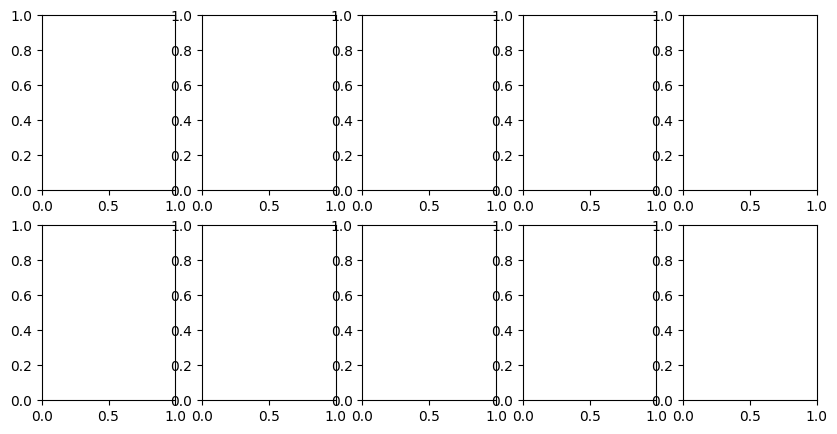

In [37]:
# Separate images for label 0 and label 1
images_3 = X[y == 3]  # Get all images with label 0
images_5 = X[y == 5]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [38]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all=np.where(predictions>=0,1,0)
    return y_pred_all

In [39]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    accuracy=0
    for epoch in range(epochs):
      for i in range(len(X)):
        prediction=np.dot(X[i],weights)+bias
        prediction=1 if prediction>=0 else 0
        if prediction!=y[i]:
          weights=weights+learning_rate*(y[i]-prediction)*X[i]
          bias=bias+learning_rate*(y[i]-prediction)
      y_pred_all=np.dot(X,weights)+bias
      y_pred_all=np.where(y_pred_all>=0,1,0)
      accuracy=np.mean(y_pred_all==y)*100
      print(f"Epoch {epoch+1}/{epochs},Accuracy:{accuracy:.1f}%")


    return weights, bias, accuracy

In [40]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100,Accuracy:18.5%
Epoch 2/100,Accuracy:20.0%
Epoch 3/100,Accuracy:20.8%
Epoch 4/100,Accuracy:20.5%
Epoch 5/100,Accuracy:20.5%
Epoch 6/100,Accuracy:20.6%
Epoch 7/100,Accuracy:20.6%
Epoch 8/100,Accuracy:20.3%
Epoch 9/100,Accuracy:20.4%
Epoch 10/100,Accuracy:20.3%
Epoch 11/100,Accuracy:20.3%
Epoch 12/100,Accuracy:20.3%
Epoch 13/100,Accuracy:20.3%
Epoch 14/100,Accuracy:20.3%
Epoch 15/100,Accuracy:20.2%
Epoch 16/100,Accuracy:20.1%
Epoch 17/100,Accuracy:20.1%
Epoch 18/100,Accuracy:20.1%
Epoch 19/100,Accuracy:20.3%
Epoch 20/100,Accuracy:20.3%
Epoch 21/100,Accuracy:20.2%
Epoch 22/100,Accuracy:20.2%
Epoch 23/100,Accuracy:20.1%
Epoch 24/100,Accuracy:20.2%
Epoch 25/100,Accuracy:20.2%
Epoch 26/100,Accuracy:20.2%
Epoch 27/100,Accuracy:20.1%
Epoch 28/100,Accuracy:20.1%
Epoch 29/100,Accuracy:20.1%
Epoch 30/100,Accuracy:20.1%
Epoch 31/100,Accuracy:20.1%
Epoch 32/100,Accuracy:20.0%
Epoch 33/100,Accuracy:20.0%
Epoch 34/100,Accuracy:20.0%
Epoch 35/100,Accuracy:20.0%
Epoch 36/100,Accuracy:20.0%
E